In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers.core import Dropout
from keras.optimizers import SGD
from keras.layers.advanced_activations import LeakyReLU
from keras.initializers import TruncatedNormal

In [7]:
mnist = datasets.fetch_mldata('MNIST original', data_home='.')

In [39]:
n = len(mnist.data)
N = 20000
indices = np.random.permutation(range(n))[:N]
X = mnist.data[indices]
y = mnist.target[indices]
Y = np.eye(10)[y.astype(int)]

# 正規化するために最大値255で割る（0〜1の範囲となる)
X = X / 255.0
# 平均を0とする
X = X - X.mean(axis=1).reshape(len(X), 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, train_size=0.8)
print(len(X_train), len(Y_train))
print(len(X_validation), len(Y_validation))
print(len(X_test), len(Y_test))

12800 12800
3200 3200
4000 4000


In [50]:
def weight_variable(shape):
    return np.random.normal(scale=0.1, size=shape)

In [52]:
n_in = len(X[0]) # 784
n_hidden = [200, 200, 200]
n_out = len(Y[0]) # 10
dropout_rate = 0.5
model = Sequential()

for i, h in enumerate(n_hidden):
    if i == 0:
        # model.add(Dense(h, input_dim=n_in, kernel_initializer=weight_variable))
        model.add(Dense(h, input_dim=n_in, kernel_initializer='he_normal'))
    else:
        model.add(Dense(h, kernel_initializer='he_normal'))
    model.add(Activation('relu'))
    model.add(Dropout(dropout_rate))

model.add(Dense(n_out, kernel_initializer=weight_variable))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])

In [53]:
epochs = 200
batch_size = 100

hist = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_validation, Y_validation))

Train on 12800 samples, validate on 3200 samples
Epoch 1/200
12800/12800 [==============================] - 3s - loss: 2.3193 - acc: 0.1540 - val_loss: 2.0405 - val_acc: 0.5762
Epoch 2/200
12800/12800 [==============================] - 2s - loss: 2.0792 - acc: 0.2608 - val_loss: 1.7564 - val_acc: 0.6425
Epoch 3/200
12800/12800 [==============================] - 1s - loss: 1.8394 - acc: 0.3651 - val_loss: 1.4008 - val_acc: 0.6909
Epoch 4/200
12800/12800 [==============================] - 2s - loss: 1.5976 - acc: 0.4531 - val_loss: 1.1022 - val_acc: 0.7406
Epoch 5/200
12800/12800 [==============================] - 1s - loss: 1.4012 - acc: 0.5150 - val_loss: 0.9039 - val_acc: 0.7734
Epoch 6/200
12800/12800 [==============================] - 1s - loss: 1.2485 - acc: 0.5670 - val_loss: 0.7712 - val_acc: 0.8022
Epoch 7/200
12800/12800 [==============================] - 1s - loss: 1.1254 - acc: 0.6166 - val_loss: 0.6751 - val_acc: 0.8238
Epoch 8/200
12800/12800 [==============================

KeyboardInterrupt: 

In [37]:
loss_and_accuracy = model.evaluate(X_test, Y_test)
print(loss_and_accuracy)

3840/4000 [===========================>..] - ETA: 0s[0.16519954389613123, 0.95474999999999999]


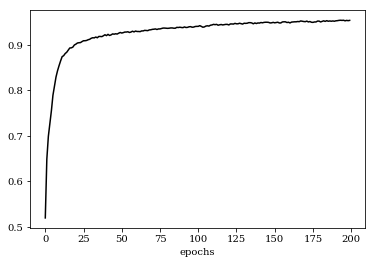

In [38]:
val_acc = hist.history['val_acc']

plt.rc('font', family='serif')
fig = plt.figure()
plt.plot(range(epochs), val_acc, label='acc', color='black')
plt.xlabel('epochs')
plt.show()